<a href="https://colab.research.google.com/github/Rhythm1821/kidney-stone-detection-using-yolov8/blob/main/AI_Powered_Kidney_Stone_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Get the data

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [3]:
!kaggle datasets download -d safurahajiheidari/kidney-stone-images

kidney-stone-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_ref=zipfile.ZipFile("kidney-stone-images.zip")
zip_ref.extractall("/content")
zip_ref.close()

## 1. Import dependencies

In [83]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, Image

## 2. Visualizing images and bounding boxes

### 2.1 Visualizing original image

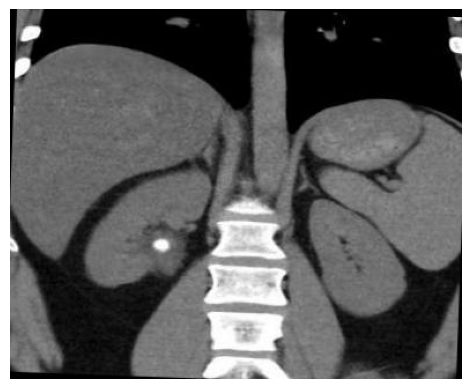

In [6]:
img = plt.imread("train/images/1-3-46-670589-33-1-63700700749865510700001-5062181202000819812_png_jpg.rf.269520bcaab75e008e00f57f3fa98851.jpg")
plt.imshow(img)
plt.axis('off')
plt.show()

### 2.2 Visualizing Image with bounding box annotation

In [7]:
img_label_path = "train/labels/1-3-46-670589-33-1-63700700749865510700001-5062181202000819812_png_jpg.rf.269520bcaab75e008e00f57f3fa98851.txt"
with open(img_label_path, "rb") as f:
    label_data = f.read()
label_parts=label_data.decode("utf-8").split()
label_parts = label_data.decode("utf-8").split()  # Decode and split the label data
label_parts

['0', '0.3312020460358056', '0.6359375', '0.0639386189258312', '0.0625']

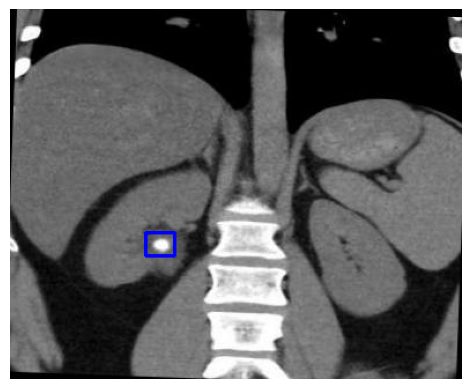

In [8]:
# Extract the coordinates from the label data
x, y, width, height = map(float, label_parts[1:])  # Convert to float

# Calculate the bounding box coordinates
img_height, img_width, _ = img.shape
left = int((x - width / 2) * img_width)
top = int((y - height / 2) * img_height)
right = int((x + width / 2) * img_width)
bottom = int((y + height / 2) * img_height)

# Ensure the coordinates are within the image boundaries
left = max(0, left)
top = max(0, top)
right = min(img_width, right)
bottom = min(img_height, bottom)

# Draw the rectangle on the image
color = (255, 0, 0)  # Red color (BGR format)
thickness = 2  # Line thickness
cv2.rectangle(img, (left, top), (right, bottom), color, thickness)

# Display the labeled image using Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')  # Remove axis labels and ticks
plt.show()

In [9]:
def show_labelled_images(img_path, label_path):
    img = plt.imread(img_path)
    with open(label_path, "rb") as f:
        label_data = f.read()
    label_parts = label_data.decode("utf-8").split()
    label_parts = [eval(i) for i in label_parts]

    for i in range(0, len(label_parts), 5):
        x, y, width, height = label_parts[i + 1:i + 5]

        # Calculate the bounding box coordinates
        img_height, img_width, _ = img.shape
        left = int((x - width / 2) * img_width)
        top = int((y - height / 2) * img_height)
        right = int((x + width / 2) * img_width)
        bottom = int((y + height / 2) * img_height)

        # Draw the rectangle on the image
        color = (255, 0, 0)  # Red color (BGR format)
        thickness = 2  # Line thickness
        cv2.rectangle(img, (left, top), (right, bottom), color, thickness)

    # Display the labeled image using Matplotlib after drawing all the bounding boxes
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')  # Remove axis labels and ticks
    plt.show()

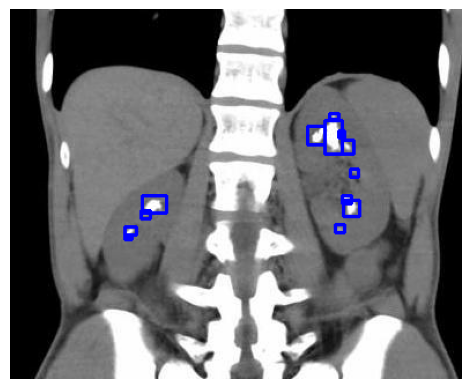

In [10]:
img_path = "/content/valid/images/1-3-46-670589-33-1-63703718086220125900001-5014104694799407369_png_jpg.rf.964d590909d71e836492f7dcc4cb9fc5.jpg"
label_path = "/content/valid/labels/1-3-46-670589-33-1-63703718086220125900001-5014104694799407369_png_jpg.rf.964d590909d71e836492f7dcc4cb9fc5.txt"
show_labelled_images(img_path,label_path)

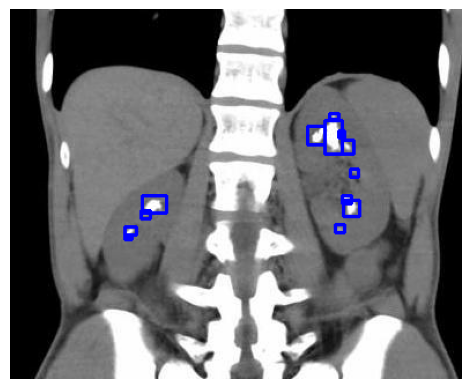

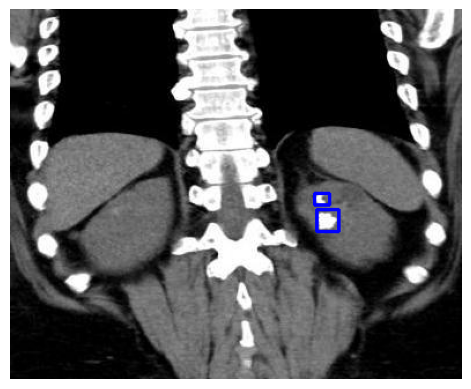

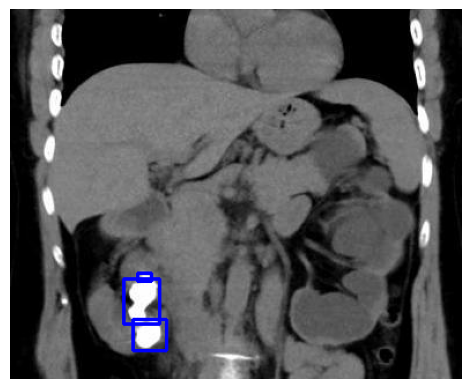

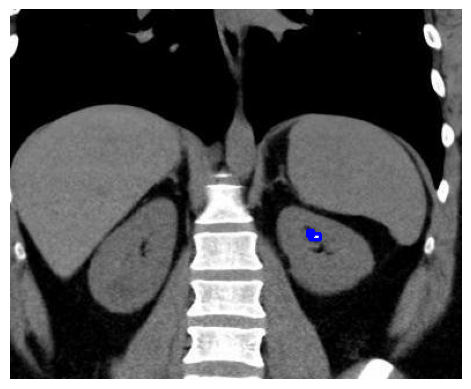

In [15]:
def random_images(directory, num_images=4):
    image_folder = os.path.join(directory, 'images')
    label_folder = os.path.join(directory, 'labels')

    image_files = os.listdir(image_folder)
    selected_images = random.sample(image_files, min(num_images, len(image_files)))

    for image in selected_images:
        image_path = os.path.join(image_folder, image)
        label_name = image.replace(".jpg",'.txt')
        label_path = os.path.join(label_folder, label_name)
        show_labelled_images(image_path, label_path)
random_images("/content/valid",4)

## 3. Yolo implementation (Trained the model in kaggle notebook and stored the artifacts)

In [51]:
try:
  import ultralytics
except:
  !pip install ultralytics
from ultralytics import YOLO

In [13]:
# model = YOLO("yolov8x.pt")

In [17]:
# model.train(data="/content/data.yaml",
#            epochs=50,
#            lr0=0.01)

In [20]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
%cd /content/drive/MyDrive/kidney-stone-detection/artifacts

/content/drive/MyDrive/kidney-stone-detection/artifacts


In [23]:
!ls runs/detect/train/

args.yaml					  R_curve.png	       val_batch0_labels.jpg
confusion_matrix_normalized.png			  results.csv	       val_batch0_pred.jpg
confusion_matrix.png				  results.png	       val_batch1_labels.jpg
events.out.tfevents.1698926248.1db447b538ac.32.0  train_batch0.jpg     val_batch1_pred.jpg
F1_curve.png					  train_batch1.jpg     val_batch2_labels.jpg
labels_correlogram.jpg				  train_batch2640.jpg  val_batch2_pred.jpg
labels.jpg					  train_batch2641.jpg  weights
P_curve.png					  train_batch2642.jpg
PR_curve.png					  train_batch2.jpg


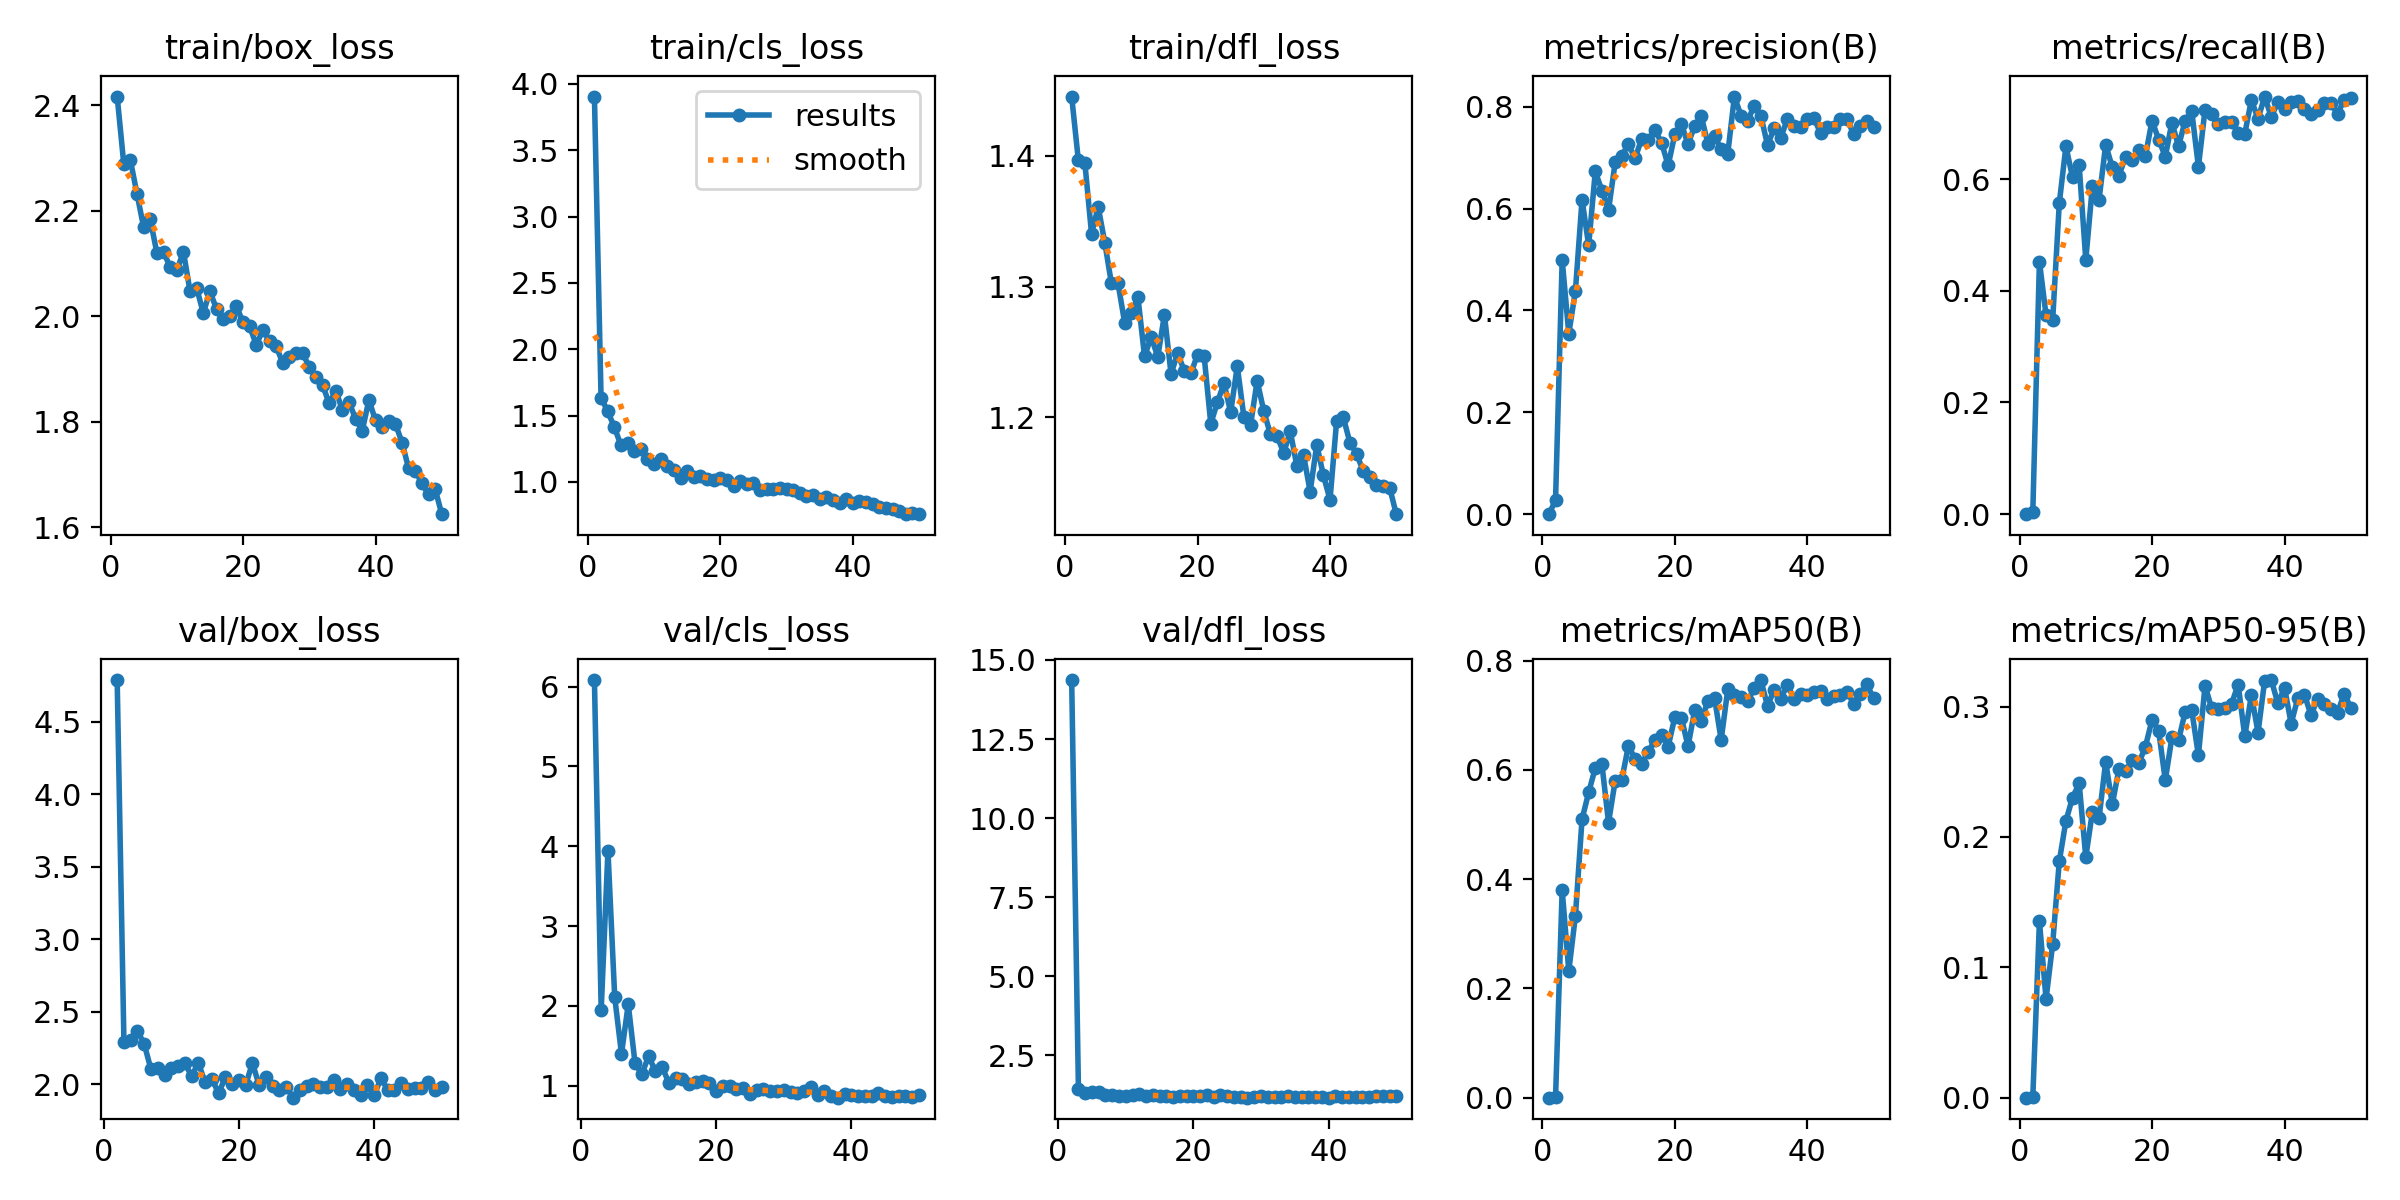

In [29]:
Image(filename="runs/detect/train/results.png",width=600)

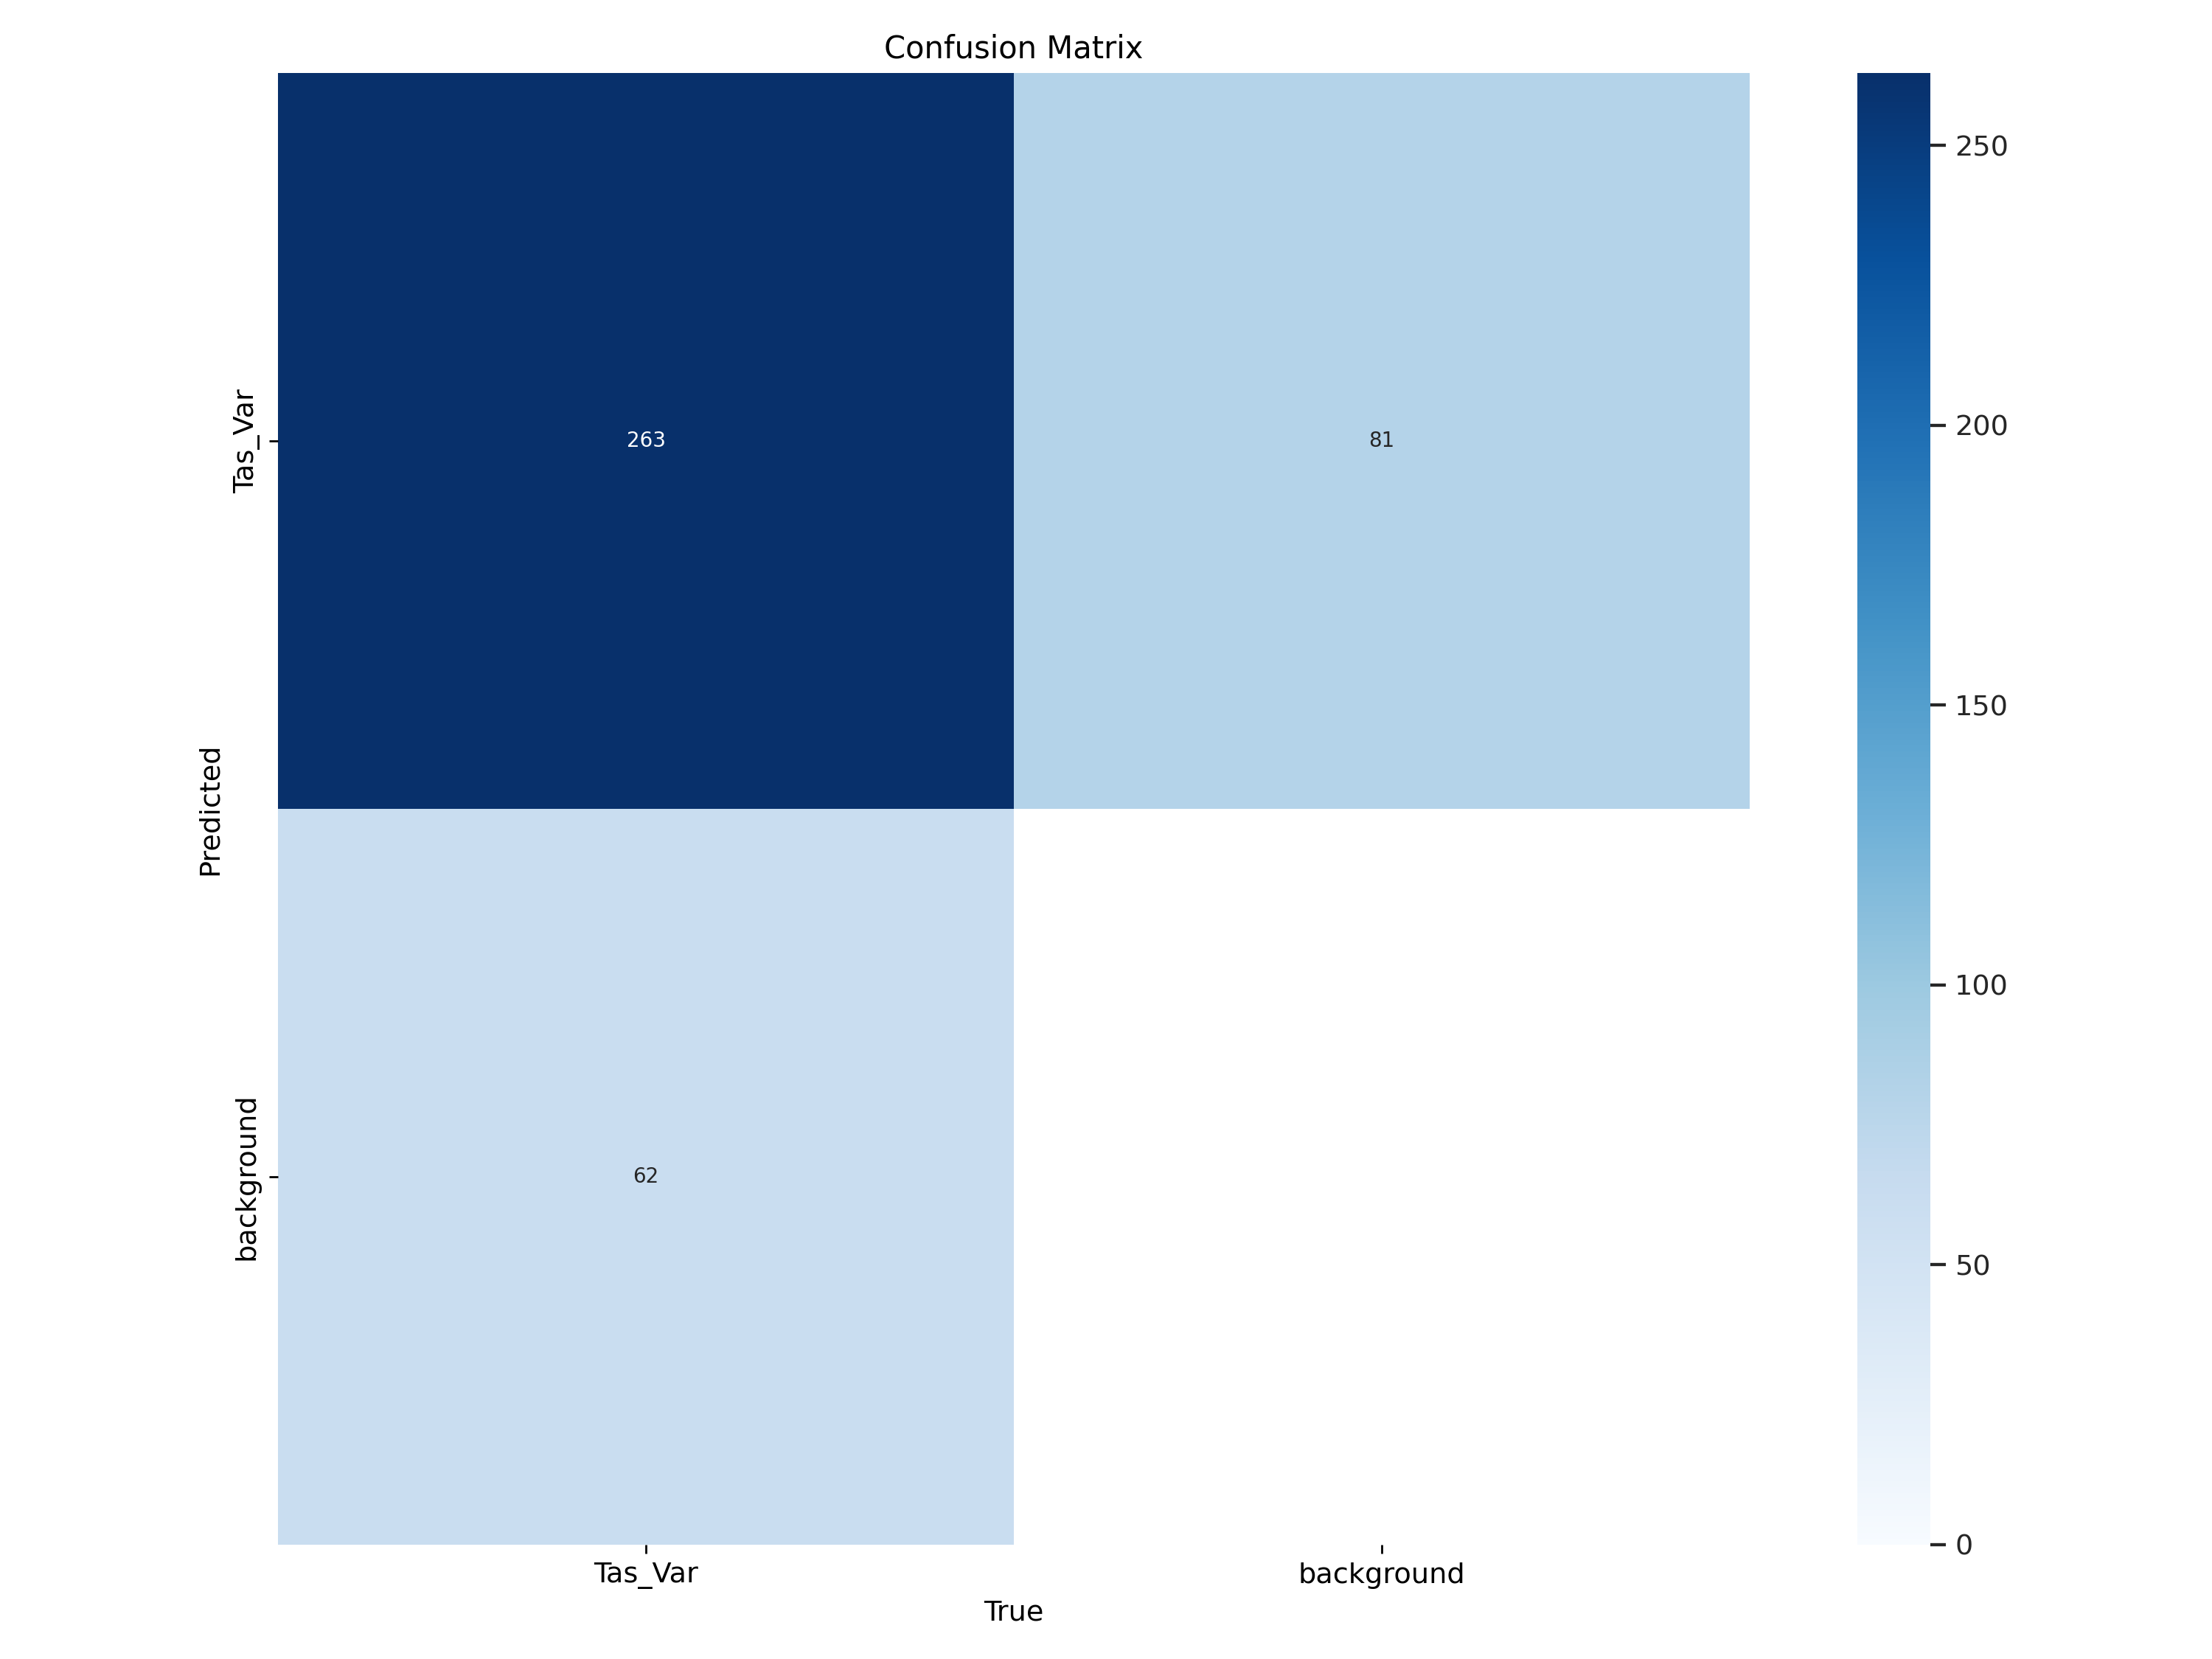

In [33]:
Image("runs/detect/train/confusion_matrix.png",width=600)

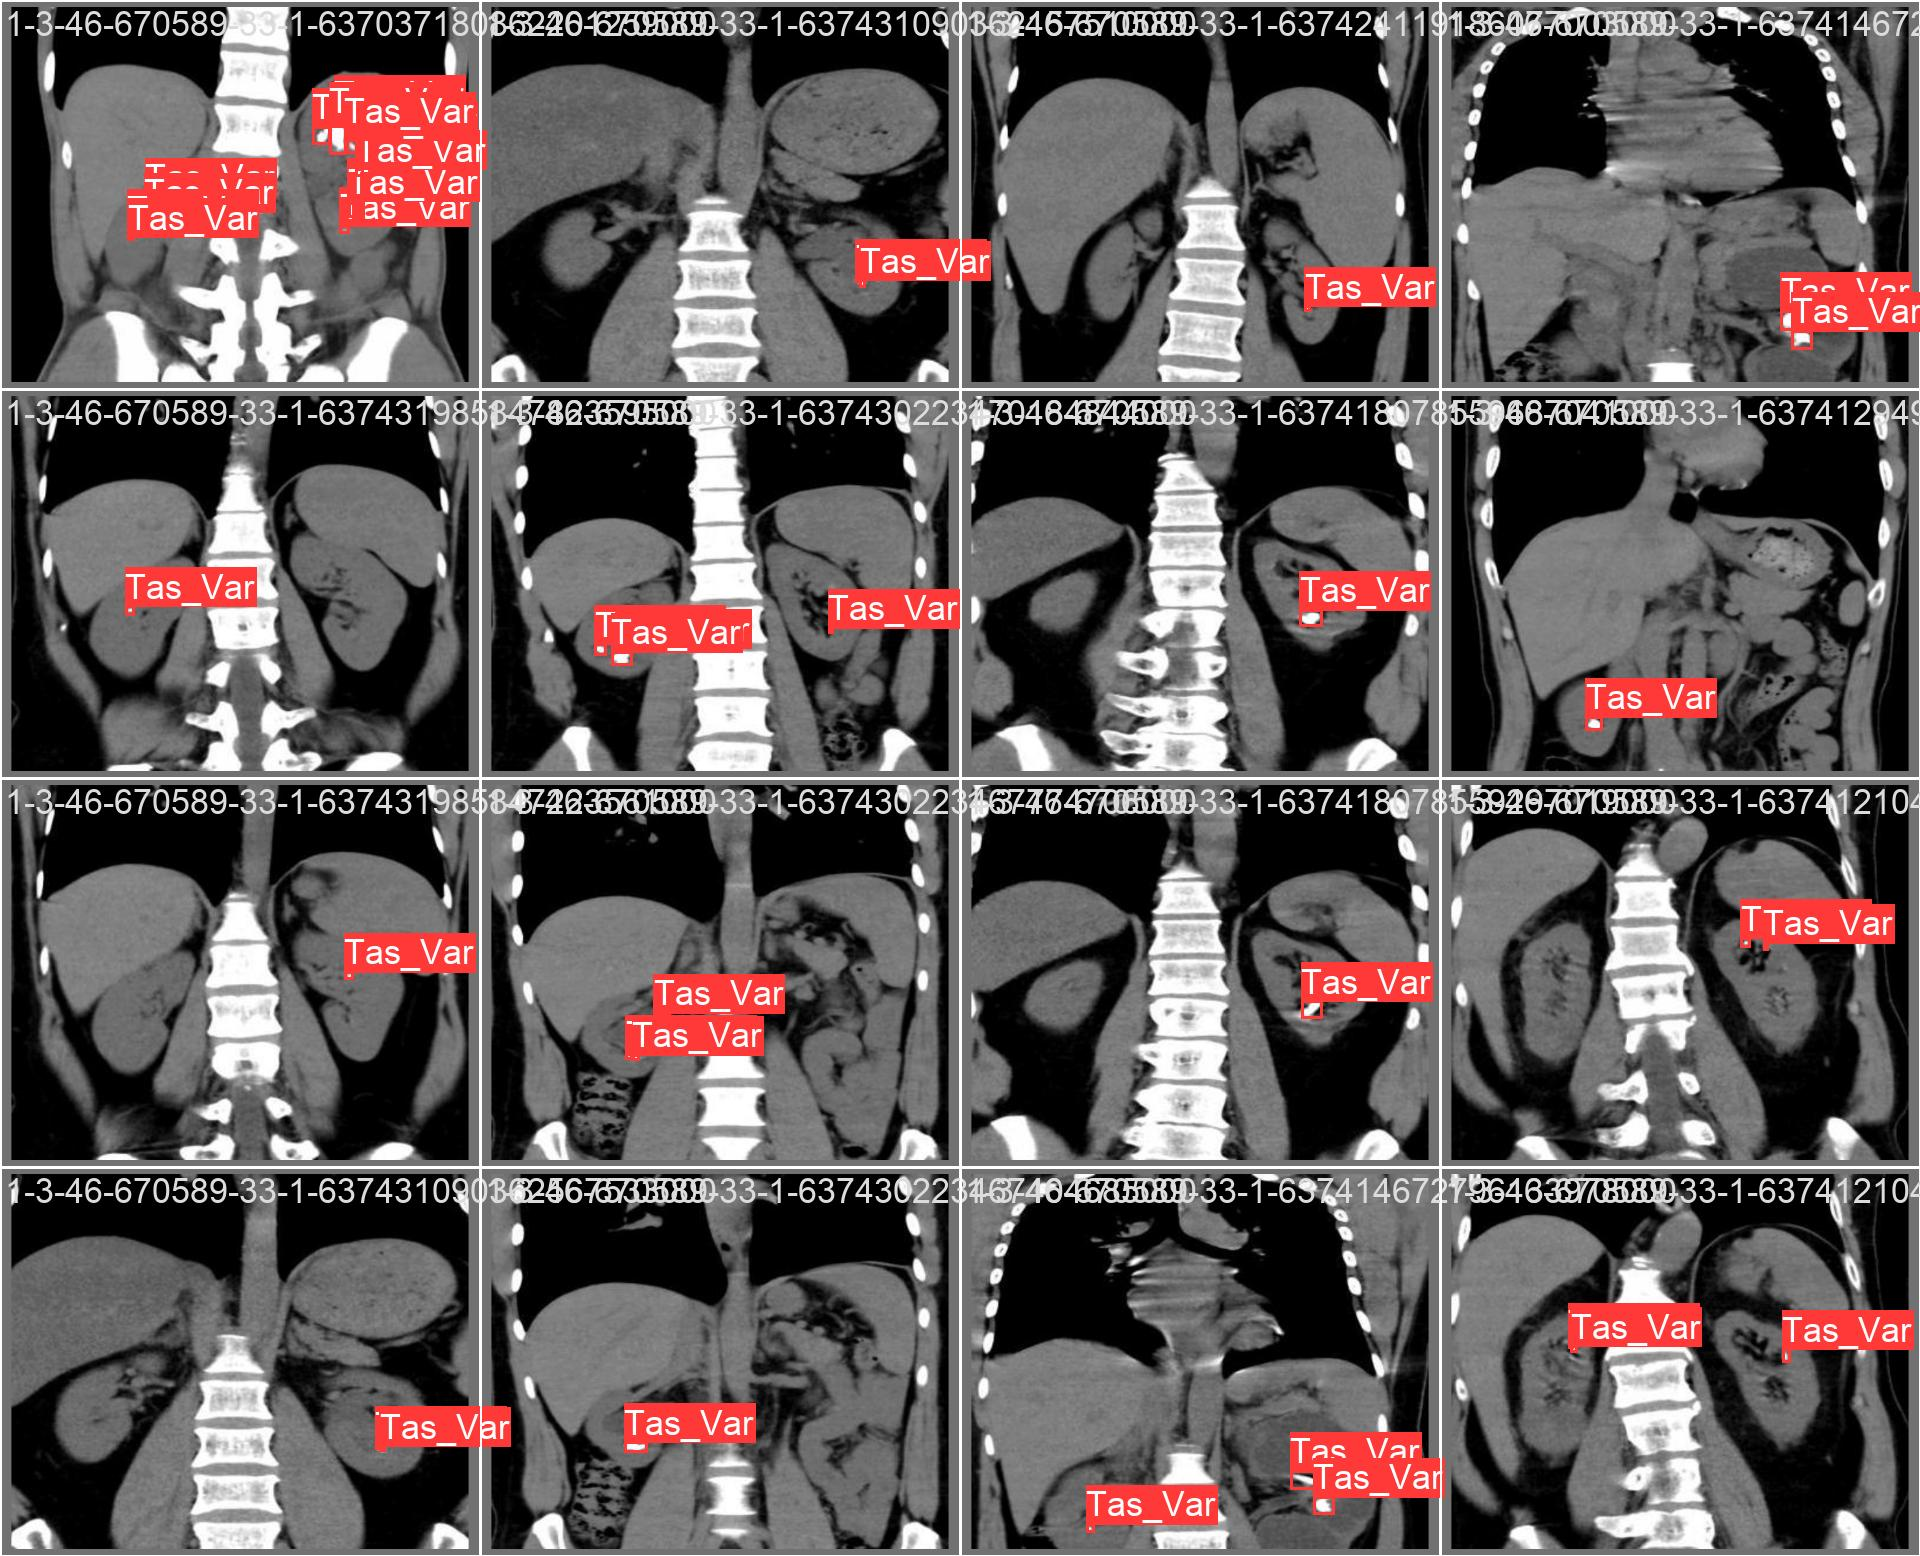

In [35]:
Image("runs/detect/train/val_batch0_labels.jpg",width=600)

In [38]:
!yolo task=detect mode=val model=/content/drive/MyDrive/kidney-stone-detection/artifacts/runs/detect/train/weights/best.pt data=/content/data.yaml

Ultralytics YOLOv8.0.205 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/valid/labels.cache... 123 images, 0 backgrounds, 0 corrupt: 100% 123/123 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [09:24<00:00, 70.60s/it]
                   all        123        325      0.773      0.748      0.756      0.321
Speed: 8.2ms preprocess, 4571.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


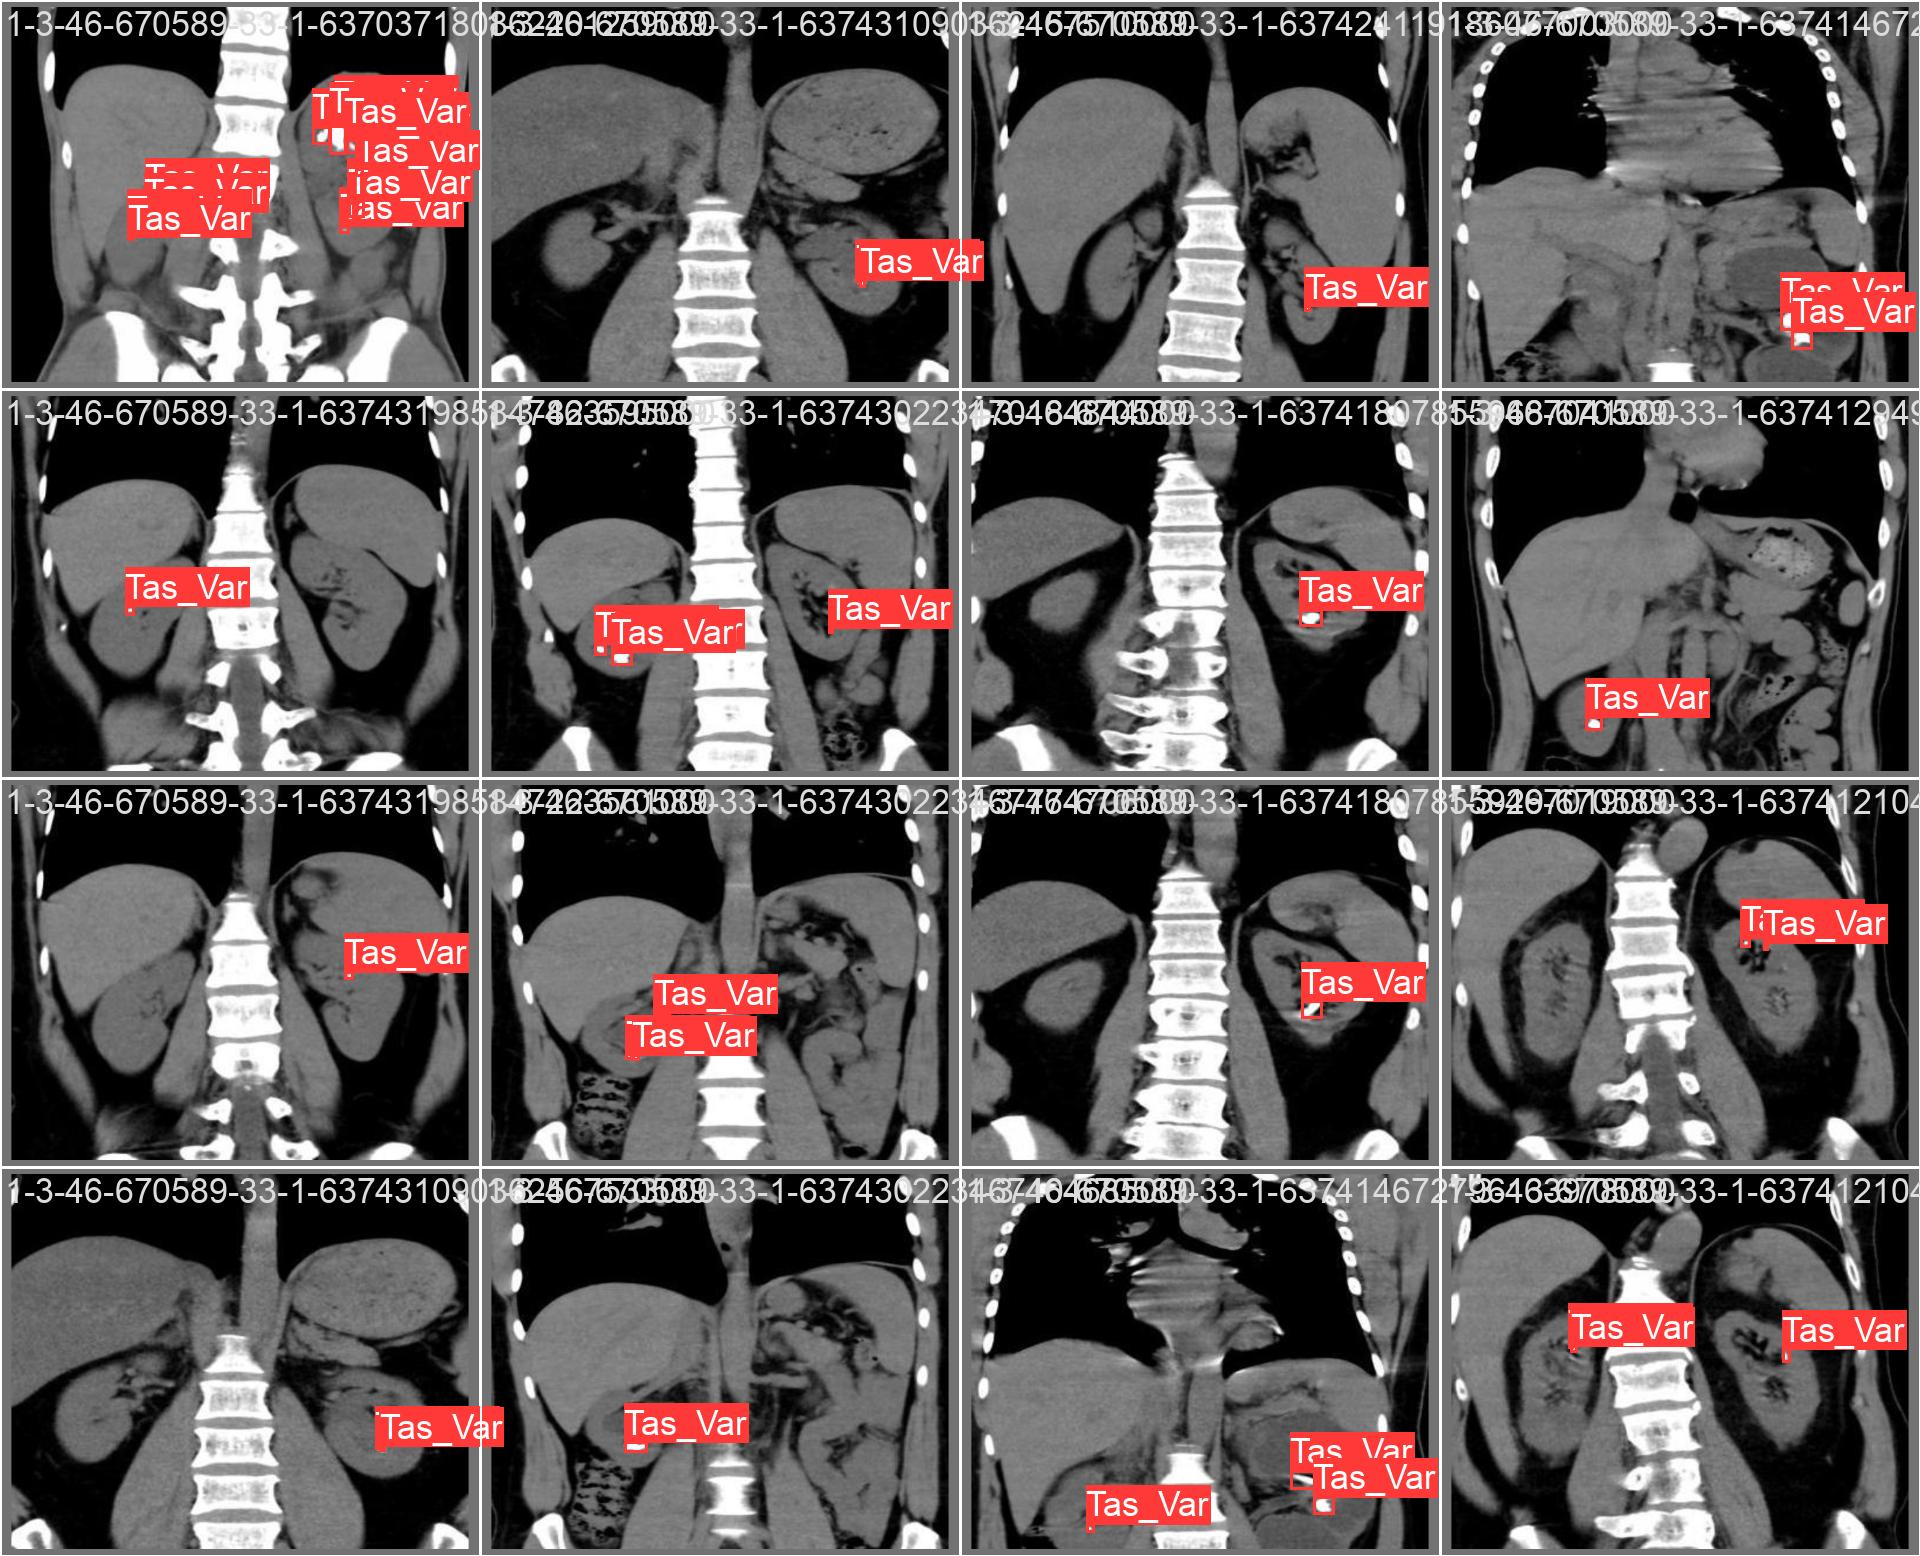

In [41]:
Image("/content/drive/MyDrive/kidney-stone-detection/artifacts/runs/detect/val2/val_batch0_labels.jpg",width=600)

In [42]:
%pwd

'/content/drive/MyDrive/kidney-stone-detection/artifacts'

In [48]:
weights=os.path.join(".","runs","detect","train","weights","best.pt")

In [52]:
model=YOLO(weights)

In [55]:
pred=model("/content/test/images/1-3-46-670589-33-1-63705542123217653900001-5305208767418446842_png_jpg.rf.d6f32a0ac819e4f2a870edfc1ce8079b.jpg")[0]


image 1/1 /content/test/images/1-3-46-670589-33-1-63705542123217653900001-5305208767418446842_png_jpg.rf.d6f32a0ac819e4f2a870edfc1ce8079b.jpg: 544x640 2 Tas_Vars, 5100.6ms
Speed: 3.3ms preprocess, 5100.6ms inference, 0.9ms postprocess per image at shape (1, 3, 544, 640)


In [75]:
data["xyxy"]

[[90.1471, 213.1136, 111.3843, 231.9162],
 [97.8512, 237.1924, 105.3192, 244.055]]

In [79]:
pred.boxes.conf.tolist()

[0.7024712562561035, 0.6491902470588684]

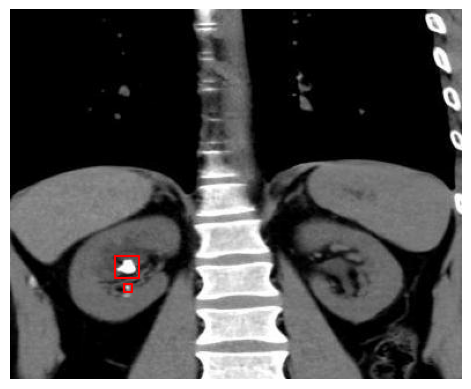

In [82]:
data = {
    "xyxy": [[round(num, 4) for num in inner] for inner in pred.boxes.xyxy.tolist()],
    "conf": pred.boxes.conf.tolist()
}

# Read and display the image
image = pred[0].orig_img
plt.imshow(image)

# Extract and plot the bounding boxes
for box, conf in zip(data['xyxy'], data['conf']):
    x1, y1, x2, y2 = box
    plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], label=f'Confidence: {conf}', color='red')

plt.axis('off')
plt.show()


In [77]:
import torch

# Given PyTorch tensor 'a'
a = torch.tensor([[90.1471, 213.1136, 111.3843, 231.9162],
                  [97.8512, 237.1924, 105.3192, 244.0550]])

# Convert PyTorch tensor 'a' to a Python list 'b' with rounded values
b = [[round(num, 4) for num in inner] for inner in a.tolist()]
a

tensor([[ 90.1471, 213.1136, 111.3843, 231.9162],
        [ 97.8512, 237.1924, 105.3192, 244.0550]])